# Assignment 08: Advanced Pandas

## Introduction

In this assignment, you will apply pandas techniques to analyse the `results.csv` dataset from Formula 1 races. Each question is designed to test your ability to manipulate and analyse data in Python.

## Instructions

- **Data Loading**: Use `pd.read_csv()` to load the `results.csv` dataset. The data are [available as a `.csv` file](https://github.com/danilofreire/qtm350/blob/main/assignments/results.csv) in the `assignments` folder or in the `08-assignment.zip` file in the `assignments` folder [in the course repository](https://github.com/danilofreire/qtm350/blob/main/assignments/08-assignment.zip). Treat `\\N` as `NaN` when loading the data.
- **Data Cleaning**: Ensure that all relevant columns are in the appropriate data types before performing analyses. Convert the `time` and `fastestLapTime` columns to `timedelta` data types, and the others to numeric data types if necessary (`to_numeric`).

## Questions

### 1. Filtering Top 5 Finishers

- **Functions to Use**: `query()`
  
- **Task**: Filter the DataFrame to include only drivers who finished in the top 5 positions (`position`). Return the resulting DataFrame with all relevant columns.

### 2. Handling Missing Race Times

- **Functions to Use**: `to_timedelta()`, `fillna()` (search what `to_timedelta()` does)
  
- **Task**: Identify missing values in the `time` column and fill them with the median race time. Ensure that the `time` column remains in an appropriate data format after filling. Use the option `errors='coerce'` if necessary.

### 3. Total Points per Driver

- **Functions to Use**: `groupby()`, `agg()`, `reset_index()`
  
- **Task**: Calculate the total points earned by each driver across all races. Return a DataFrame with columns `driverId` and `TotalPoints`.

### 4. Constructors with Most Wins

- **Functions to Use**: `query()`, `groupby()`, `agg()`, `reset_index()`
  
- **Task**: Determine which `constructorId` has the highest number of first-place finishes (`position == 1`). Return the `constructorId` along with the number of wins.

### 5. Average Fastest Lap Speed per Race

- **Functions to Use**: `groupby()`, `agg()`, `reset_index()`
  
- **Task**: Calculate the average `fastestLapSpeed` for each `raceId`. Return a DataFrame with columns `raceId` and `AverageFastestLapSpeed`.

### 6. Top 3 Drivers by Average Position

- **Functions to Use**: `groupby()`, `agg()`, `nsmallest()`, `reset_index()`
  
- **Task**: Identify the top 3 drivers with the lowest average `positionOrder` (indicating better performance). Return a DataFrame with columns: `driverId` and `AveragePosition`.

### 7. Distribution of Starting Grid Positions

- **Functions to Use**: `plot()`, `hist()`
  
- **Task**: Create a histogram to visualise the distribution of `grid` positions from which drivers started the races. Customise the histogram with appropriate titles and labels.

### 8. Identifying Consistent Finishers

- **Functions to Use**: `groupby()`, `filter()`, `unique()`
  
- **Task**: Identify drivers who have finished every race they entered (`statusId == 1`). Return a list of their `driverId`s. You may need to create a custom function to filter the data, such as `lambda x: (x['statusId'] == 1).all())`.

### 9. Fastest Laps by Driver

- **Functions to Use**: `groupby()`, `agg()`, `reset_index()`, `to_timedelta()`
  
- **Task**: For each driver, find the fastest `fastestLapTime` they have achieved. Return a DataFrame with columns: `driverId` and `FastestLapTime`.

### 10. Correlation Between Grid Position and Final Position

- **Functions to Use**: `dropna()`, `corr()`, `to_numeric()`
  
- **Task**: Compute the correlation coefficient between starting `grid` position and final `position`. Interpret the strength and direction of the relationship.

---

## Bonus Question

### Combining GroupBy with Custom Aggregations

- **Functions to Use**: `groupby()`, `agg()`, `reset_index()`
  
- **Task**: Group the data by `driverId` and `Year` (if available), then calculate:
  - The number of races participated in.
  - The total points earned.
  - The best finishing position achieved.
  
- Return a DataFrame with columns: `Driver`, `Year`, `RacesParticipated`, `TotalPoints`, and `BestPosition`.

---

Good luck! 😊

In [3]:
import pandas as pd

# Load the dataset, treating '\\N' as NaN
results = pd.read_csv('results.csv', na_values='\\N')

# Convert 'time' and 'fastestLapTime' to timedelta format
results['time'] = pd.to_timedelta(results['time'], errors='coerce')
results['fastestLapTime'] = pd.to_timedelta(results['fastestLapTime'], errors='coerce')

# Convert other relevant columns to numeric, coercing errors to NaN
for column in results.columns:
    if column not in ['time', 'fastestLapTime']:
        results[column] = pd.to_numeric(results[column], errors='coerce')

# Display the cleaned DataFrame (optional)
print(results.head())


   resultId  raceId  driverId  constructorId  number  grid  position  \
0         1      18         1              1    22.0     1       1.0   
1         2      18         2              2     3.0     5       2.0   
2         3      18         3              3     7.0     7       3.0   
3         4      18         4              4     5.0    11       4.0   
4         5      18         5              1    23.0     3       5.0   

   positionText  positionOrder  points  laps                   time  \
0           1.0              1    10.0    58 0 days 01:34:50.616000   
1           2.0              2     8.0    58                    NaT   
2           3.0              3     6.0    58                    NaT   
3           4.0              4     5.0    58                    NaT   
4           5.0              5     4.0    58                    NaT   

   milliseconds  fastestLap  rank fastestLapTime  fastestLapSpeed  statusId  
0     5690616.0        39.0   2.0            NaT          218.

In [4]:
# Question 1
top_5_finishers_df = results.query("position <= 5")

# Display the filtered DataFrame (optional)
print(top_5_finishers_df.head())

   resultId  raceId  driverId  constructorId  number  grid  position  \
0         1      18         1              1    22.0     1       1.0   
1         2      18         2              2     3.0     5       2.0   
2         3      18         3              3     7.0     7       3.0   
3         4      18         4              4     5.0    11       4.0   
4         5      18         5              1    23.0     3       5.0   

   positionText  positionOrder  points  laps                   time  \
0           1.0              1    10.0    58 0 days 01:34:50.616000   
1           2.0              2     8.0    58                    NaT   
2           3.0              3     6.0    58                    NaT   
3           4.0              4     5.0    58                    NaT   
4           5.0              5     4.0    58                    NaT   

   milliseconds  fastestLap  rank fastestLapTime  fastestLapSpeed  statusId  
0     5690616.0        39.0   2.0            NaT          218.

In [5]:
# Question 2
# Convert 'time' column to timedelta format
results['time'] = pd.to_timedelta(results['time'], errors='coerce')

# Calculate the median time, ignoring NaT values
median_time = results['time'].median()

# Fill missing values in the 'time' column with the median race time
results['time'] = results['time'].fillna(median_time)

# Display the updated DataFrame (optional)
print(results.head())

   resultId  raceId  driverId  constructorId  number  grid  position  \
0         1      18         1              1    22.0     1       1.0   
1         2      18         2              2     3.0     5       2.0   
2         3      18         3              3     7.0     7       3.0   
3         4      18         4              4     5.0    11       4.0   
4         5      18         5              1    23.0     3       5.0   

   positionText  positionOrder  points  laps                   time  \
0           1.0              1    10.0    58 0 days 01:34:50.616000   
1           2.0              2     8.0    58 0 days 01:38:30.175000   
2           3.0              3     6.0    58 0 days 01:38:30.175000   
3           4.0              4     5.0    58 0 days 01:38:30.175000   
4           5.0              5     4.0    58 0 days 01:38:30.175000   

   milliseconds  fastestLap  rank fastestLapTime  fastestLapSpeed  statusId  
0     5690616.0        39.0   2.0            NaT          218.

In [6]:
# Question 3
# Calculate the total points earned by each driver across all races
total_points_per_driver = results.groupby('driverId').agg(TotalPoints=('points', 'sum')).reset_index()

# Display the resulting DataFrame (optional)
print(total_points_per_driver)

     driverId  TotalPoints
0           1       4396.5
1           2        259.0
2           3       1594.5
3           4       2061.0
4           5        105.0
..        ...          ...
850       852         44.0
851       853          0.0
852       854         12.0
853       855          6.0
854       856          2.0

[855 rows x 2 columns]


In [7]:
# Question 4
# Filter the DataFrame to include only first-place finishes (position == 1)
first_place_finishes = results.query("position == 1")

# Group by constructorId and count the number of wins
constructor_wins = first_place_finishes.groupby('constructorId').agg(Wins=('position', 'count')).reset_index()

# Identify the constructorId with the highest number of wins
most_wins_constructor = constructor_wins.sort_values(by='Wins', ascending=False).head(1)

# Display the resulting DataFrame (optional)
print(most_wins_constructor)

   constructorId  Wins
5              6   243


In [8]:
# Question 5
# Calculate the average fastestLapSpeed for each raceId
average_fastest_lap_speed_per_race = results.groupby('raceId').agg(AverageFastestLapSpeed=('fastestLapSpeed', 'mean')).reset_index()

# Display the resulting DataFrame (optional)
print(average_fastest_lap_speed_per_race)

      raceId  AverageFastestLapSpeed
0          1              214.918895
1          2              202.320556
2          3              171.060450
3          4              204.150650
4          5              199.641562
...      ...                     ...
1074    1092              196.660722
1075    1093              195.484737
1076    1094              187.508450
1077    1095              207.119389
1078    1096              211.681050

[1079 rows x 2 columns]


In [9]:
# Question 6
# Calculate the average positionOrder for each driver
average_position_per_driver = results.groupby('driverId').agg(AveragePosition=('positionOrder', 'mean')).reset_index()

# Identify the top 3 drivers with the lowest average positionOrder
top_3_drivers_by_average_position = average_position_per_driver.nsmallest(3, 'AveragePosition')

# Display the resulting DataFrame (optional)
print(top_3_drivers_by_average_position)


     driverId  AveragePosition
590       591              2.0
801       802              2.0
765       766              3.5


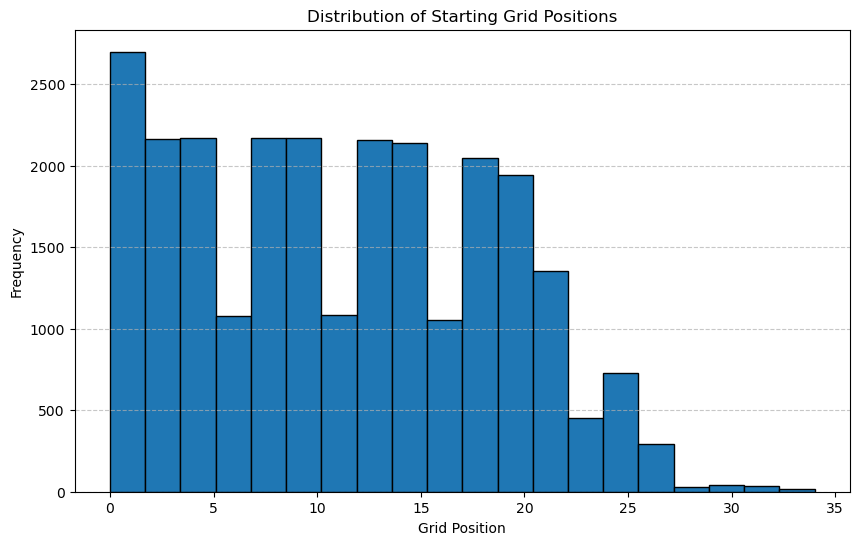

In [10]:
# Question 7
import matplotlib.pyplot as plt

# Create a histogram to visualize the distribution of starting grid positions
plt.figure(figsize=(10, 6))
plt.hist(results['grid'].dropna(), bins=20, edgecolor='black')

# Customize the histogram with titles and labels
plt.title("Distribution of Starting Grid Positions")
plt.xlabel("Grid Position")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


In [11]:
# Question 8
# Identify drivers who have finished every race they entered (statusId == 1)
consistent_finishers = results.groupby('driverId').filter(lambda x: (x['statusId'] == 1).all())

# Extract the unique driverIds from the filtered data
consistent_driver_ids = consistent_finishers['driverId'].unique().tolist()

# Display the list of driverIds who have consistently finished every race
print(consistent_driver_ids)


[515, 557, 591, 674, 727, 802, 851, 856]


In [12]:
# Question 9
# Convert the 'fastestLapTime' column to timedelta format for accurate calculations
results['fastestLapTime'] = pd.to_timedelta(results['fastestLapTime'], errors='coerce')

# Find the fastest lap time for each driver
fastest_laps_by_driver = results.groupby('driverId').agg(FastestLapTime=('fastestLapTime', 'min')).reset_index()

# Display the resulting DataFrame (optional)
print(fastest_laps_by_driver)

     driverId FastestLapTime
0           1            NaT
1           2            NaT
2           3            NaT
3           4            NaT
4           5            NaT
..        ...            ...
850       852            NaT
851       853            NaT
852       854            NaT
853       855            NaT
854       856            NaT

[855 rows x 2 columns]


In [24]:
# Question 10
# Ensure 'grid' and 'position' columns are numeric
results['grid'] = pd.to_numeric(results['grid'], errors='coerce')
results['position'] = pd.to_numeric(results['position'], errors='coerce')

# Drop rows with NaN values in 'grid' or 'position' columns
results_no_na = results.dropna(subset=['grid', 'position'])

# Calculate the correlation coefficient between 'grid' (starting position) and 'position' (final position)
correlation_coefficient = results_no_na['grid'].corr(results_no_na['position'])

# Display the result
print("Correlation Coefficient between Grid Position and Final Position:", correlation_coefficient)

Correlation Coefficient between Grid Position and Final Position: 0.6432946507834114


In [25]:
# Bonus Question
# Check if 'Year' column exists; if not, proceed without it
if 'year' in results.columns:
    # Group by driverId and year, if available
    grouped_data = results.groupby(['driverId', 'year']).agg(
        RacesParticipated=('raceId', 'nunique'),     # Count unique races
        TotalPoints=('points', 'sum'),               # Sum of points earned
        BestPosition=('position', 'min')             # Best finishing position
    ).reset_index()
else:
    # Group by driverId only, if year is not available
    grouped_data = results.groupby('driverId').agg(
        RacesParticipated=('raceId', 'nunique'),     # Count unique races
        TotalPoints=('points', 'sum'),               # Sum of points earned
        BestPosition=('position', 'min')             # Best finishing position
    ).reset_index()

# Rename columns to match the specified output
grouped_data.rename(columns={'driverId': 'Driver', 'year': 'Year'}, inplace=True)

# Display the resulting DataFrame (optional)
print(grouped_data)

     Driver  RacesParticipated  TotalPoints  BestPosition
0         1                310       4396.5           1.0
1         2                184        259.0           2.0
2         3                206       1594.5           1.0
3         4                358       2061.0           1.0
4         5                112        105.0           1.0
..      ...                ...          ...           ...
850     852                 44         44.0           4.0
851     853                 22          0.0          14.0
852     854                 44         12.0           6.0
853     855                 22          6.0           8.0
854     856                  1          2.0           9.0

[855 rows x 4 columns]
